In [1]:
#!/usr/bin/python3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
from pathlib import Path
from matplotlib.pyplot import figure, draw



#########################################################################
#   Configurações globais do grafico
plt.rcParams['axes.linewidth']=2
plt.rc('font', size=18)         # controls default text sizes
#########################################################################

#########################################################################
#   Configurações para salvar e plotar o grafico
BASE_PATH = os.getcwd()
PATH_SVG=BASE_PATH+"/../../../../../presentation/images/svg/results/"
PATH_EPS=BASE_PATH+"/../../../../../presentation/images/results/crankshaft/"
fname = "speedup_mpi-vs-openmp_lumped_73800_p4"
fname_svg = PATH_SVG+fname+".svg"
fname_eps = PATH_EPS+fname+".eps"
PLOT_FIG = True
SAVE_FIG = True
#########################################################################



#   Leitura do csv para pandas
##### Resultado para CentralDifferenceLinear Local Method - LUMPED
#df = pd.read_csv('./data/Crankshaft_17810_LUMPED_P4-P2-P4.csv', sep=";", skiprows=[0])
df = pd.read_csv('./data/crankshaft_3mm_73800_mpi-vs-openmp.csv', sep=";")
pd.set_option('expand_frame_repr', False, 'display.max_rows', 999, 'display.max_columns', 999)
df

Number_Ranks  Number_Threads  Nodes_X_Threads Node+Core  P1_MPI+OpenMP_Time  P1_MPI-Per-Core_Time  P2_MPI+OpenMP_Time  P2_MPI-Per-Core_Time  P4_MPI+OpenMP_Time  P4_MPI-Per-Core_Time  P1_MPI+OpenMP_Speedup  P1_MPI-Per-Core_Speedup  P2_MPI+OpenMP_Speedup  P2_MPI-Per-Core_Speedup  P4_MPI+OpenMP_Speedup  P4_MPI-Per-Core_Speedup
0              1               1                1       1+1             41.5024               30.1905            256.2593              208.5656           4122.2960             3971.9789                 1.0000                   1.0000                 1.0000                   1.0000                 1.0000                   1.0000
1              1               2                2       1+2             26.9377               15.5964            152.4576              121.0787           2338.6631             1843.4911                 1.5406                   1.9357                 1.6808                   1.7225                 1.7626                   2.1545
2              1               4                4       1+4             15.5533                7.8621             75.6061               57.0554           1138.8755              971.0438                 2.6683                   3.8400                 3.3893                   3.6554                 3.6196                   4.0904
3              1               8                8       1+8              7.9522                4.1419             40.5317               31.1278            675.5205              502.8925                 5.2189                   7.2890                 6.3224                   6.7003                 6.1023                   7.8982
4              1              16               16      1+16              8.2025                2.5383             27.4130               18.8651            343.7401              335.2837                 5.0597                  11.8939                 9.3480                  11.0556                11.9924                  11.8466
5              1              20               20      1+20              7.8299                2.0981             23.3675               15.4587            289.7253              260.8905                 5.3005                  14.3894                10.9664                  13.4917                14.2282                  15.2246
6              2               1                2       2+1             21.9725               15.9324            144.1428              120.6010           2092.2066             1872.5862                 1.8888                   1.8949                 1.7778                   1.7293                 1.9703                   2.1211
7              2               2                4       2+2             16.0666                8.0304             89.3166               57.0509           1584.0966              919.9806                 2.5831                   3.7595                 2.8691                   3.6557                 2.6023                   4.3174
8              2               4                8       2+4              9.1778                4.2070             50.7559               30.6400            878.2139              465.9220                 4.5220                   7.1762                 5.0488                   6.8069                 4.6939                   8.5249
9              2               8               16       2+8              6.2727                2.1116             34.2813               15.8888            521.6642              241.2691                 6.6163                  14.2974                 7.4751                  13.1265                 7.9022                  16.4628
10             2              16               32      2+16              4.7927                1.2652             25.6492               10.4709            350.7683              135.0854                 8.6595                  23.8622                 9.9909                  19.9185                11.7521                  29.4034
11             2              20            

In [2]:
df_p4_openmp = df[df['P4_MPI+OpenMP_Speedup'] == df.groupby(['Number_Ranks'])['P4_MPI+OpenMP_Speedup'].transform(max)]
df_p4_mpi = df[df['P4_MPI-Per-Core_Speedup'] == df.groupby(['Number_Ranks'])['P4_MPI-Per-Core_Speedup'].transform(max)]
# df_p2 = df[df['P2_SpeedUp'] == df.groupby(['Number_Ranks'])['P2_SpeedUp'].transform(max)]
# df_p4 = df[df['P4_SpeedUp'] == df.groupby(['Number_Ranks'])['P4_SpeedUp'].transform(max)]
df_p4_mpi
df_p4_openmp=df_p4_openmp.rename(columns={"P4_MPI+OpenMP_Speedup": "P4_MPI+OpenMP_Speedup_Max"})
df_p4_mpi=df_p4_mpi.rename(columns={"P4_MPI-Per-Core_Speedup": "P4_MPI-Per-Core_Speedup_Max"})
# df_p2=df_p2.rename(columns={"P2_SpeedUp": "P2_SpeedUp_Max"})
# df_p4=df_p4.rename(columns={"P4_SpeedUp": "P4_SpeedUp_Max"})
df_p4_openmp

Number_Ranks  Number_Threads  Nodes_X_Threads Node+Core  P1_MPI+OpenMP_Time  P1_MPI-Per-Core_Time  P2_MPI+OpenMP_Time  P2_MPI-Per-Core_Time  P4_MPI+OpenMP_Time  P4_MPI-Per-Core_Time  P1_MPI+OpenMP_Speedup  P1_MPI-Per-Core_Speedup  P2_MPI+OpenMP_Speedup  P2_MPI-Per-Core_Speedup  P4_MPI+OpenMP_Speedup_Max  P4_MPI-Per-Core_Speedup
5              1              20               20      1+20              7.8299                2.0981             23.3675               15.4587            289.7253              260.8905                 5.3005                  14.3894                10.9664                  13.4917                    14.2282                  15.2246
11             2              20               40      2+20              4.7016                1.0249             26.2539                7.4599            321.5677              108.6857                 8.8272                  29.4570                 9.7608                  27.9582                    12.8193                  36.5455
17             4              20               80      4+20              2.3735                0.5209             11.4668                3.8039            128.5972               54.8355                17.4857                  57.9583                22.3479                  54.8294                    32.0558                  72.4344
23             8              20              160      8+20              1.2673                0.2805              5.7199                2.1130             71.6283               28.0573                32.7486                 107.6310                44.8013                  98.7059                    57.5512                 141.5666

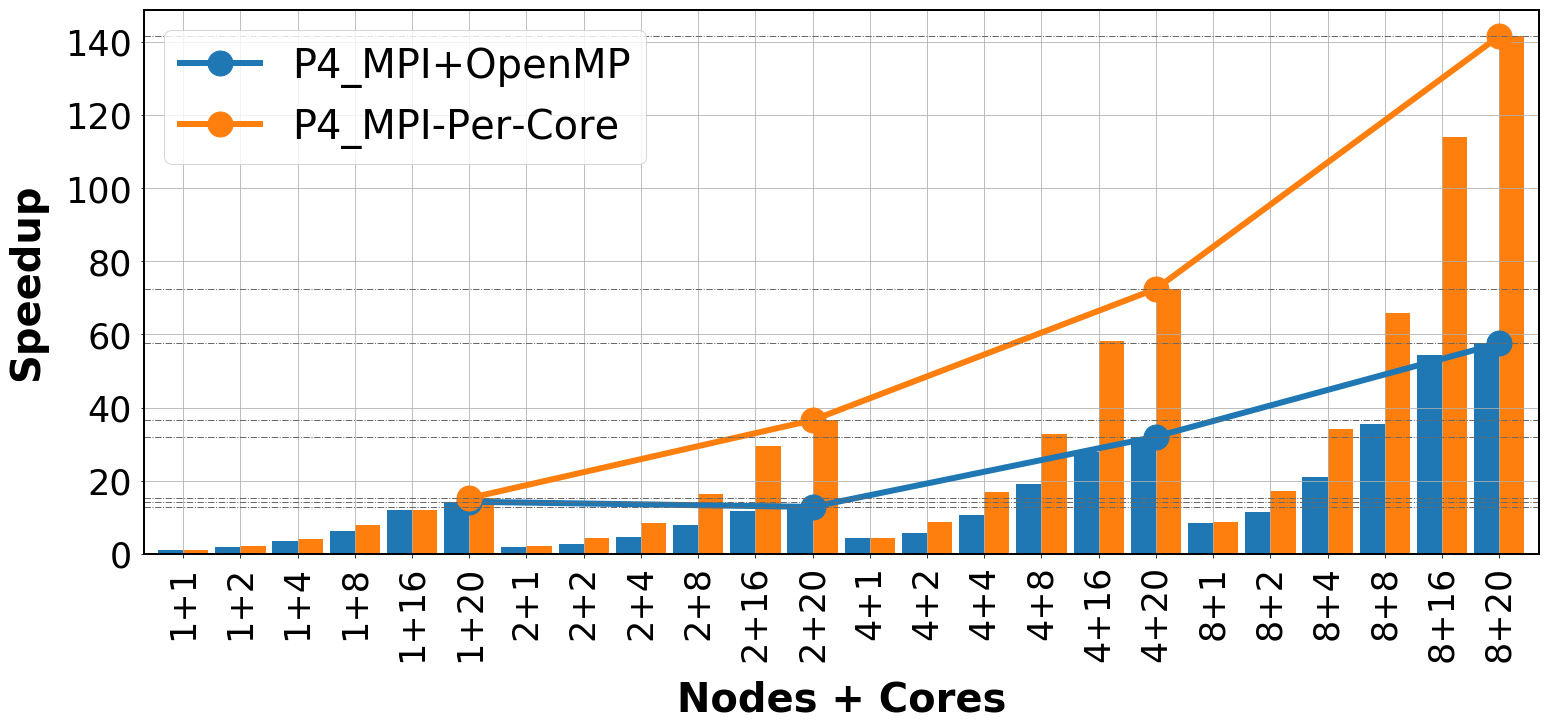

In [3]:

fig = df[['Node+Core', 'P4_MPI+OpenMP_Speedup', 'P4_MPI-Per-Core_Speedup']].\
plot(kind='bar', 
     x='Node+Core', 
     width=0.88, 
     fontsize=40, 
     figsize=(25, 10)
).get_figure()

ax = fig.gca()
ax.plot(df.loc[df_p4_openmp.index, ['P4_MPI+OpenMP_Speedup']],
        marker='o',
        linestyle='-',
        linewidth=6.0, markersize=25)

ax.plot(df.loc[df_p4_mpi.index, ['P4_MPI-Per-Core_Speedup']],
         marker='o',
         linestyle='-',
         linewidth=6.0, markersize=25)


lines = df_p4_openmp['P4_MPI+OpenMP_Speedup_Max'].values
for i in lines:
    plt.axhline(i, linestyle='-.', color='dimgrey', linewidth='1.0')
lines = df_p4_mpi['P4_MPI-Per-Core_Speedup_Max'].values
for i in lines:
    plt.axhline(i, linestyle='-.', color='dimgrey', linewidth='1.0')



plt.legend(loc=(0.05, .72), fontsize=30, frameon=True)
plt.xticks(fontsize=35, rotation=90)
plt.yticks(fontsize=35)
ax.tick_params(axis='x', which='major', pad=8)
ax.tick_params(axis='y', which='major', pad=8)
plt.xlabel('Nodes + Cores', fontsize=40, fontweight='bold', labelpad=18)
plt.ylabel('Speedup', fontsize=40, fontweight='bold', labelpad=18)
plt.legend(labels=["P4_MPI+OpenMP", "P4_MPI-Per-Core"], fontsize=40)


# xs=df_p4.index
# ys=df_p4['P4_SpeedUp_Max'].values

# # zip joins x and y coordinates in pairs
# for x,y in zip(xs,ys):
#     label = "{:.2f}".format(y)
#     plt.annotate(label, # this is the text
#                  (x,y), # this is the point to label
#                  textcoords="offset points", # how to position the text
#                  xytext=(0,10), # distance from text to points (x,y)
#                  fontsize=50.0,
#                  ha='center') # horizontal alignment can be left, right or center
    
    

plt.grid()
plt.show()

In [4]:
#   Salva a figura
if (SAVE_FIG):
    fn = Path(fname_svg).expanduser()
    draw() # necessary to render figure before saving
    fig.savefig(fn, bbox_inches='tight')

    fn = Path(fname_eps).expanduser()
    draw() # necessary to render figure before saving
    fig.savefig(fn, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>